Here's a breakdown of my datasets

1. Field Player Stats (Player-Level)
Files:
modified_field_player_detail_2020_2021.csv
modified_field_player_detail_2021_2022.csv
modified_field_player_detail_2022_2023.csv
modified_field_player_detail_2023_2024.csv
Headers:
POS Position, Name, Team, Position, P Played, G 7M goals, % 7M Shooting accuracy, G Full back - Goals, % Full back - Shooting accuracy, T Centre back - Goals, % Centre back - Shooting accuracy, G Wing - Goals, % Wing - Shooting accuracy, G Pivot - Goals, % Pivot - Shooting accuracy, G Fast breaks - Goals, % Fast breaks - Shooting accuracy

2. Goalkeeper Stats (Player-Level)
Files:
modified_Goalkeeper_2020_2021.csv
modified_Goalkeeper_2021_2022.csv
modified_Goalkeeper_2022_2023.csv
modified_Goalkeeper_2023_2024.csv
Headers:
POS Position, Name, Team, Position, P Played, S Saves, S 7M saves, % 7M save accuracy, S Full back - Saves, % Full back - Save accuracy, P Centre back - Saves, % Centre back - Save accuracy, S Wing - Saves, % Wing - Save accuracy, S Pivot - Saves, % Pivot - Save accuracy, S Fast breaks - Saves, % Fast breaks - Save accuracy, G Goals

3. Team Offensive Performance (Team-Level)
Files:
Team_offense_2020_2021.csv
Team_offense_2021_2022.csv
Team_offense_2022_2023.csv
Team_offense_2023_2024.csv
Headers:
POS Position, Team, P Played, G Goals, FG Field goals, G 7M goals, % Shooting accuracy, G Full back - Goals, % Full back - Shooting accuracy, T Centre back - Goals, % Centre back - Shooting accuracy, G Wing - Goals, % Wing - Shooting accuracy, G Pivot - Goals, % Pivot - Shooting accuracy, G Fast breaks - Goals, % Fast breaks - Shooting accuracy, TF Technical Fouls

4. Team Defensive Performance (Team-Level)
Files:
Team_defense_2020_2021.csv
Team_defense_2021_2022.csv
Team_defense_2022_2023.csv
Team_defense_2023_2024.csv
Headers:
POS Position, Team, P Played, GC Goals conceded, S Saves, % Save accuracy, GC 7m Goals conceded, GC Centre back - Goals conceded, GC Full back - Goals conceded, GC Wing - Goals conceded, GC Pivot - Goals conceded, GC Fast breaks - Goals conceded, ST Steals, BL Blocks, YC Yellow cards, 2Min Sin-bins, RC Red cards, BC Blue Cards

5. Overall Team Standings (Team-Level)
Files:
Overall_standings_2020_2021_modified.csv
Overall_standings_2021_2022_modified.csv
Overall_standings_2022_2023_modified.csv
Overall_standings_2023_2024_modified.csv
Headers:
P, Team, G, W, D, L, Pts, Diff, +, -


installing lib

In [2]:
pip install pandas matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


code to convert html file to csv for making new datasets from the "daikin-hbl" site 

In [18]:
import csv
from bs4 import BeautifulSoup

# Load the HTML file
with open('input_name.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse the HTML content using the built-in HTML parser
soup = BeautifulSoup(html_content, 'html.parser')

# Find the table
table = soup.find('table')

# Extract table headers
headers = [header.text.strip() for header in table.find_all('th')]

# Extract table rows
rows = []
for row in table.find_all('tr'):
    cells = row.find_all(['td', 'th'])
    rows.append([cell.text.strip() for cell in cells])

# Write to CSV
with open('output_name.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    # Write headers if present
    if headers:
        writer.writerow(headers)
    # Write the rows
    writer.writerows(rows)

code to fix csv from "daikin-hbl" site 

In [8]:
import pandas as pd
import re

# Load the CSV file and skip the first two rows
file_path = 'Goalkeeper_2023_2024.csv'
df = pd.read_csv(file_path, skiprows=2)

# Find the index of the "Name" column
name_index = df.columns.get_loc("Name")

# Insert two new columns next to "Name"
df.insert(name_index + 1, "Team", "")
df.insert(name_index + 2, "Position", "")

def extract_details(name):
    # Extract the first name
    first_comma_index = name.find(',')
    first_name = name[:first_comma_index].strip()
    
    # Remaining part after the first comma
    remaining_part = name[first_comma_index + 1:].strip()
    
    # Extract the position (after the last comma)
    last_comma_index = remaining_part.rfind(',')
    position = remaining_part[last_comma_index + 1:].strip()
    
    # Extract the team name (search backward from the last comma for the first lowercase letter)
    team_name_part = remaining_part[:last_comma_index].strip()
    
    # Find the start index of the team name
    lowercase_match = re.search(r'[a-z]', team_name_part[::-1])
    if lowercase_match:
        team_name_start_index = len(team_name_part) - lowercase_match.start()  # Calculate start index from end
    else:
        team_name_start_index = 0  # Fallback in case no lowercase letter is found

    # Extract the team name
    team_name = team_name_part[team_name_start_index:].strip()
    
    last_name_start_index = 3  # Fallback if 'Â' is not found
    
    # Extract the last name (from the adjusted start index to the start of the team name)
    last_name = team_name_part[last_name_start_index:team_name_start_index].strip()
    
    formatted_name = f"{first_name} {last_name}".strip()
    
    return formatted_name, team_name, position

# Apply the function to extract team and position, and correct the name
df['Name'], df['Team'], df['Position'] = zip(*df['Name'].apply(extract_details))

# Save the modified DataFrame to a new CSV file
df.to_csv('modified_Goalkeeper_2023_2024.csv', index=False)


short the team's names in the excel

In [3]:
import csv

# Mapping of team names to shortcuts
team_shortcuts = {
    "THW Kiel": "THW",
    "SG Flensburg-Handewitt": "SGF",
    "SC Magdeburg": "SCM",
    "FÃ¼chse Berlin": "BER",
    "Rhein-Neckar LÃ¶wen": "RNL",
    "SC DHfK Leipzig": "LEI",
    "FRISCH AUF! GÃ¶ppingen": "FAG",
    "MT Melsungen": "MTM",
    "TBV Lemgo Lippe": "TBV",
    "HSG Wetzlar": "WET",
    "TSV Hannover-Burgdorf": "HAN",
    "Bergischer HC": "BHC",
    "HC Erlangen": "HCE",
    "TVB Stuttgart": "TVB",
    "HBW Balingen-Weilstetten": "HBW",
    "GWD Minden": "GWD",
    "Eulen Ludwigshafen": "LUD",
    "HSG Nordhorn-Lingen": "NOL",
    "TuSEM Essen": "TUE",
    "HSC 2000 Coburg": "COB"
}

# Function to replace team names with shortcuts
def replace_team_names(input_file, output_file):
    with open(input_file, mode='r', newline='', encoding='utf-8') as infile, \
         open(output_file, mode='w', newline='', encoding='utf-8') as outfile:
        
        reader = csv.reader(infile)
        writer = csv.writer(outfile)
        
        for row in reader:
            new_row = [team_shortcuts.get(cell, cell) for cell in row]
            writer.writerow(new_row)

# Replace 'input.csv' with your actual input file and specify the desired output file
input_file = 'Overall_standings_2023_2024.csv'
output_file = 'Overall_standings_2023_2024_modified.csv'

replace_team_names(input_file, output_file)


## Data Processing and Merging Pipeline for Predictive Modeling

This code block is designed to load, clean, and merge datasets for player and goalkeeper statistics from multiple seasons. The merged data will be used for building predictive models to forecast team success. 


In [48]:
import numpy as np
import pandas as pd
import plotly.express as px

# Load the datasets
player_stats = pd.concat([
    pd.read_csv(f'modified_field_player_detail_{year}.csv') for year in ['2020_2021', '2021_2022', '2022_2023']
])

goalkeeper_stats = pd.concat([
    pd.read_csv(f'modified_Goalkeeper_{year}.csv') for year in ['2020_2021', '2021_2022', '2022_2023']
])

team_offense = pd.concat([
    pd.read_csv(f'Team_offense_{year}.csv') for year in ['2020_2021', '2021_2022', '2022_2023']
])

team_defense = pd.concat([
    pd.read_csv(f'Team_defense_{year}.csv') for year in ['2020_2021', '2021_2022', '2022_2023']
])

team_standings = pd.concat([
    pd.read_csv(f'Overall_standings_{year}_modified.csv') for year in ['2020_2021', '2021_2022', '2022_2023']
])

# Ensure 'Team' is correctly recognized
player_stats['Team'] = player_stats['Team'].astype(str)
goalkeeper_stats['Team'] = goalkeeper_stats['Team'].astype(str)

# Remove the '%' symbol, replace '-' with NaN, and convert relevant columns to numeric
for col in player_stats.columns:
    if player_stats[col].dtype == 'object' and '%' in str(player_stats[col].iloc[0]):
        player_stats[col] = player_stats[col].replace('-', np.nan)  # Replace '-' with NaN
        player_stats[col] = player_stats[col].str.rstrip('%').astype(float)

for col in goalkeeper_stats.columns:
    if goalkeeper_stats[col].dtype == 'object' and '%' in str(goalkeeper_stats[col].iloc[0]):
        goalkeeper_stats[col] = goalkeeper_stats[col].replace('-', np.nan)  # Replace '-' with NaN
        goalkeeper_stats[col] = goalkeeper_stats[col].str.rstrip('%').astype(float)

# Convert relevant columns to numeric, coerce errors to handle invalid parsing
numeric_player_stats = player_stats.drop(columns=['Name', 'Team', 'Position'])
numeric_goalkeeper_stats = goalkeeper_stats.drop(columns=['Name', 'Team', 'Position'])

# Apply numeric conversion
numeric_player_stats = numeric_player_stats.apply(pd.to_numeric, errors='coerce')
numeric_goalkeeper_stats = numeric_goalkeeper_stats.apply(pd.to_numeric, errors='coerce')

# Group by team and calculate mean of numeric columns
player_stats_grouped = numeric_player_stats.groupby(player_stats['Team']).mean().reset_index()
goalkeeper_stats_grouped = numeric_goalkeeper_stats.groupby(goalkeeper_stats['Team']).mean().reset_index()

# Convert 'Team' columns to string type to ensure consistent data type
team_offense['Team'] = team_offense['Team'].astype(str)
team_defense['Team'] = team_defense['Team'].astype(str)
player_stats_grouped['Team'] = player_stats_grouped['Team'].astype(str)
goalkeeper_stats_grouped['Team'] = goalkeeper_stats_grouped['Team'].astype(str)
team_standings['Team'] = team_standings['Team'].astype(str)

# Find the intersection of all teams
teams_offense = set(team_offense['Team'].unique())
teams_defense = set(team_defense['Team'].unique())
teams_player_stats = set(player_stats_grouped['Team'].unique())
teams_goalkeeper_stats = set(goalkeeper_stats_grouped['Team'].unique())
teams_standings = set(team_standings['Team'].unique())

common_teams = teams_offense.intersection(teams_defense, teams_player_stats, teams_goalkeeper_stats, teams_standings)

# Filter each DataFrame to include only common teams
team_offense_filtered = team_offense[team_offense['Team'].isin(common_teams)]
team_defense_filtered = team_defense[team_defense['Team'].isin(common_teams)]
player_stats_grouped_filtered = player_stats_grouped[player_stats_grouped['Team'].isin(common_teams)]
goalkeeper_stats_grouped_filtered = goalkeeper_stats_grouped[goalkeeper_stats_grouped['Team'].isin(common_teams)]
team_standings_filtered = team_standings[team_standings['Team'].isin(common_teams)]

# Merge the filtered DataFrames
merged_data_filtered = team_offense_filtered.merge(team_defense_filtered, on='Team', suffixes=('_offense', '_defense'), how='inner')
merged_data_filtered = merged_data_filtered.merge(player_stats_grouped_filtered, on='Team', how='inner')
merged_data_filtered = merged_data_filtered.merge(goalkeeper_stats_grouped_filtered, on='Team', how='inner')
merged_data_filtered = merged_data_filtered.merge(team_standings_filtered, on='Team', how='inner')

for col in merged_data_filtered.columns:
    if merged_data_filtered[col].dtype == 'object' and merged_data_filtered[col].str.contains('%').any():
        merged_data_filtered[col] = merged_data_filtered[col].replace('-', np.nan)  # Replace '-' with NaN
        merged_data_filtered[col] = merged_data_filtered[col].str.rstrip('%').astype(float) / 100.0

# Drop unnecessary columns if needed
merged_data_filtered = merged_data_filtered.drop(columns=['POS Position_offense', 'POS Position_defense'])

# Handle missing values (if any) by filling only numeric columns with their mean
numeric_columns = merged_data_filtered.select_dtypes(include=['number']).columns
merged_data_filtered[numeric_columns] = merged_data_filtered[numeric_columns].fillna(merged_data_filtered[numeric_columns].mean())

# At this point, merged_data_filtered is defined and you can proceed with the correlation analysis and plotting

# Drop non-numeric columns before calculating correlations
numeric_columns_only = merged_data_filtered.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns_only.corr()

# Unstack the correlation matrix and reset index to get a tidy format
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Metric1', 'Metric2', 'Correlation']

# Remove self-correlations (correlation of 1.0)
correlation_pairs = correlation_pairs[correlation_pairs['Metric1'] != correlation_pairs['Metric2']]

# Drop duplicates (since each correlation is mirrored)
correlation_pairs['Pairs'] = list(zip(correlation_pairs.Metric1, correlation_pairs.Metric2))
correlation_pairs.set_index('Pairs', inplace=True)
correlation_pairs = correlation_pairs.drop(columns=['Metric1', 'Metric2']).drop_duplicates()

# Filter for significant correlations
significant_correlations = correlation_pairs[
    (correlation_pairs['Correlation'] > 0.5) | (correlation_pairs['Correlation'] < -0.5)
]

# Prepare data for 3D scatter plot
significant_correlations = significant_correlations.reset_index()
significant_correlations[['Metric1', 'Metric2']] = pd.DataFrame(significant_correlations['Pairs'].tolist(), index=significant_correlations.index)




1. Feature Selection


In [49]:
# Define the target variable
target = 'Pts'  # Example target; change based on your data

# Select features - excluding the target, non-numeric columns, and columns that might lead to data leakage
features = merged_data_filtered.drop(columns=['Team', target])

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce')

# Handle any remaining NaN or infinite values
features = features.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
features = features.fillna(features.mean())  # Fill remaining NaN values with the mean of the column

# Target variable
target_values = merged_data_filtered[target]


2. Data Splitting


In [50]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_values, test_size=0.2, random_state=42)


3. Model Selection and Training


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Assuming that 'team_standings_filtered' is the DataFrame containing the league table
# Calculate points based on wins and draws
team_standings_filtered['Points'] = 2 * team_standings_filtered['W'] + 1 * team_standings_filtered['D']

# Drop the existing 'Points' column from merged_data_filtered if it exists
if 'Points' in merged_data_filtered.columns:
    merged_data_filtered = merged_data_filtered.drop(columns=['Points'])

# Merge Points into the main dataset
merged_data_filtered = merged_data_filtered.merge(team_standings_filtered[['Team', 'Points']], on='Team', how='left')

# Filter out any rows where Points is NaN
merged_data_filtered = merged_data_filtered.dropna(subset=['Points'])

# Clean up percentage columns - remove '%' and convert to float, handle '-'
for col in merged_data_filtered.columns:
    if merged_data_filtered[col].dtype == 'object':
        # Replace '-' with NaN
        merged_data_filtered[col] = merged_data_filtered[col].replace('-', np.nan)
        # Remove '%' and convert to float
        if merged_data_filtered[col].str.contains('%').any():
            merged_data_filtered[col] = merged_data_filtered[col].str.rstrip('%').astype(float)

# Ensure all columns are numeric, filling NaNs with the mean value
merged_data_filtered = merged_data_filtered.apply(pd.to_numeric, errors='coerce')
merged_data_filtered = merged_data_filtered.fillna(merged_data_filtered.mean())

# Set the target variable as the Points
y = merged_data_filtered['Points']

# Select features - excluding the target, non-numeric columns, and columns that might lead to data leakage
X = merged_data_filtered.drop(columns=['Points', 'Team', 'Pts'])  # Ensure 'Points' and 'Team' are not in the features

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the first 10 rows of y_train to verify
print("y_train sample:\n", y_train.head(10))

# Initialize the RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")


y_train sample:
 1182    24
199     38
873     64
1216    34
783     18
331     16
425     57
1164    18
303     36
270     35
Name: Points, dtype: int64
Mean Absolute Error: 6.617758268513249
R^2 Score: 0.6356242935774761


Making Predictions

In [71]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the 2023-2024 datasets
player_stats_2023_2024 = pd.concat([
    pd.read_csv(f'modified_field_player_detail_{year}.csv') for year in ['2023_2024']
])

goalkeeper_stats_2023_2024 = pd.concat([
    pd.read_csv(f'modified_Goalkeeper_{year}.csv') for year in ['2023_2024']
])

team_offense_2023_2024 = pd.concat([
    pd.read_csv(f'Team_offense_{year}.csv') for year in ['2023_2024']
])

team_defense_2023_2024 = pd.concat([
    pd.read_csv(f'Team_defense_{year}.csv') for year in ['2023_2024']
])


# Ensure 'Team' is correctly recognized
player_stats_2023_2024['Team'] = player_stats_2023_2024['Team'].astype(str)
goalkeeper_stats_2023_2024['Team'] = goalkeeper_stats_2023_2024['Team'].astype(str)

# Clean the percentage columns and handle '-' values
def clean_percentage_columns(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            # Replace '-' with NaN
            df[col] = df[col].replace('-', np.nan)
            
            # Handle percentage columns
            if df[col].str.contains('%').any():
                df[col] = df[col].str.rstrip('%').astype(float) / 100.0  # Convert percentages to floats
                
            # Convert numeric-like columns to float
            df[col] = pd.to_numeric(df[col], errors='ignore')
    
    return df

# Apply the cleaning function to all relevant datasets
player_stats_2023_2024 = clean_percentage_columns(player_stats_2023_2024)
goalkeeper_stats_2023_2024 = clean_percentage_columns(goalkeeper_stats_2023_2024)
team_offense_2023_2024 = clean_percentage_columns(team_offense_2023_2024)
team_defense_2023_2024 = clean_percentage_columns(team_defense_2023_2024)

# Group by team and calculate mean of numeric columns
numeric_player_stats_2023_2024 = player_stats_2023_2024.drop(columns=['Name', 'Team', 'Position']).apply(pd.to_numeric, errors='coerce')
numeric_goalkeeper_stats_2023_2024 = goalkeeper_stats_2023_2024.drop(columns=['Name', 'Team', 'Position']).apply(pd.to_numeric, errors='coerce')

player_stats_grouped_2023_2024 = numeric_player_stats_2023_2024.groupby(player_stats_2023_2024['Team']).mean().reset_index()
goalkeeper_stats_grouped_2023_2024 = numeric_goalkeeper_stats_2023_2024.groupby(goalkeeper_stats_2023_2024['Team']).mean().reset_index()

# Convert 'Team' columns to string type to ensure consistent data type
team_offense_2023_2024['Team'] = team_offense_2023_2024['Team'].astype(str)
team_defense_2023_2024['Team'] = team_defense_2023_2024['Team'].astype(str)
player_stats_grouped_2023_2024['Team'] = player_stats_grouped_2023_2024['Team'].astype(str)
goalkeeper_stats_grouped_2023_2024['Team'] = goalkeeper_stats_grouped_2023_2024['Team'].astype(str)
team_standings_2023_2024['Team'] = team_standings_2023_2024['Team'].astype(str)

# Merge the filtered DataFrames for 2023-2024
merged_data_filtered_2023_2024 = team_offense_2023_2024.merge(team_defense_2023_2024, on='Team', suffixes=('_offense', '_defense'), how='inner')
merged_data_filtered_2023_2024 = merged_data_filtered_2023_2024.merge(player_stats_grouped_2023_2024, on='Team', how='inner')
merged_data_filtered_2023_2024 = merged_data_filtered_2023_2024.merge(goalkeeper_stats_grouped_2023_2024, on='Team', how='inner')
merged_data_filtered_2023_2024 = merged_data_filtered_2023_2024.merge(team_standings_2023_2024[['Team']], on='Team', how='inner')

# Ensure the merged data has no NaN values
numeric_columns_2023_2024 = merged_data_filtered_2023_2024.select_dtypes(include=['number']).columns
merged_data_filtered_2023_2024[numeric_columns_2023_2024] = merged_data_filtered_2023_2024[numeric_columns_2023_2024].fillna(merged_data_filtered_2023_2024[numeric_columns_2023_2024].mean())

# Ensure the feature names match those used during training
X_new_data = merged_data_filtered_2023_2024.drop(columns=['Team'])  # Remove non-feature columns like 'Team'
X_new_data = X_new_data.reindex(columns=X_train.columns, fill_value=0)  # Reorder columns to match training data and fill missing columns with 0



# Predict using the 2023-2024 season data
predicted_points_2023_2024 = model.predict(X_new_data)

# Output the predicted points
print("Predicted Points for 2023-2024 Season:")
predicted_df = pd.DataFrame({'Team': merged_data_filtered_2023_2024['Team'], 'Predicted Points': predicted_points_2023_2024})
print(predicted_df)


Predicted Points for 2023-2024 Season:
   Team  Predicted Points
0   SCM         56.888631
1   SGF         55.840833
2   BER         55.959262
3   THW         56.650595
4   GUM         55.962405
5   HSV         55.724571
6   HAN         55.520667
7   TVB         56.349429
8   LEI         56.371095
9   TBV         56.162857
10  MTM         55.845905
11  FAG         56.273429
12  BHC         55.274238
13  RNL         55.129500
14  EIS         55.475286
15  WET         54.975905
16  HBW         55.573524
17  HCE         56.696500


C:\Users\shake\AppData\Local\Temp\ipykernel_21596\1519108190.py:38: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead

C:\Users\shake\AppData\Local\Temp\ipykernel_21596\1519108190.py:38: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead

C:\Users\shake\AppData\Local\Temp\ipykernel_21596\1519108190.py:38: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead

C:\Users\shake\AppData\Local\Temp\ipykernel_21596\1519108190.py:38: FutureWarning:

errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead

C:\Users\shake\AppData\Local\Temp\ipykernel_21596\1519108190.py:38: FutureWa

In [79]:
# Sort the DataFrame by 'Predicted Points' in descending order
predicted_df_sorted = predicted_df.sort_values(by='Predicted Points', ascending=False)

# Reset the index and start it from 1
predicted_df_sorted = predicted_df_sorted.reset_index(drop=True)
predicted_df_sorted.index += 1

# Display the sorted and reindexed DataFrame
print(predicted_df_sorted)


   Team  Predicted Points
1   SCM         56.888631
2   HCE         56.696500
3   THW         56.650595
4   LEI         56.371095
5   TVB         56.349429
6   FAG         56.273429
7   TBV         56.162857
8   GUM         55.962405
9   BER         55.959262
10  MTM         55.845905
11  SGF         55.840833
12  HSV         55.724571
13  HBW         55.573524
14  HAN         55.520667
15  EIS         55.475286
16  BHC         55.274238
17  RNL         55.129500
18  WET         54.975905


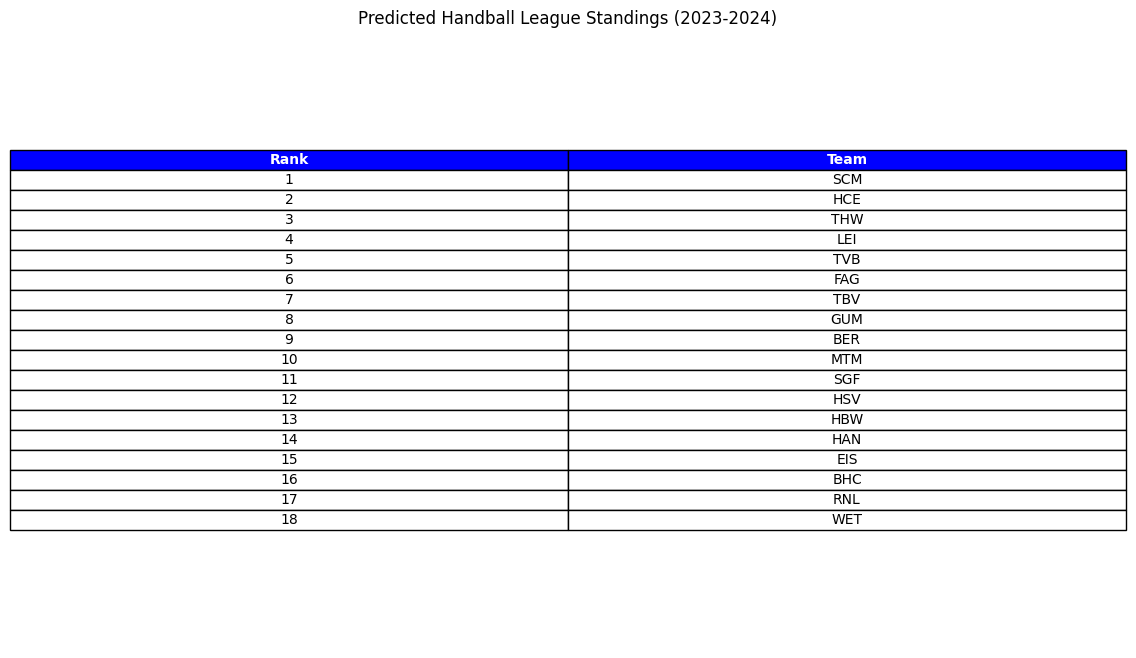

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming predicted_df_sorted is the DataFrame with the sorted predictions
# Example data (replace this with your actual predicted_df_sorted DataFrame)
predicted_df_sorted = pd.DataFrame({
    'Team': ['SCM', 'HCE', 'THW', 'LEI', 'TVB', 'FAG', 'TBV', 'GUM', 'BER', 'MTM', 'SGF', 'HSV', 'HBW', 'HAN', 'EIS', 'BHC', 'RNL', 'WET'],
    
})


# Reset the index and start it from 1
predicted_df_sorted = predicted_df_sorted.reset_index(drop=True)
predicted_df_sorted.index += 1

# Add rank column
predicted_df_sorted['Rank'] = predicted_df_sorted.index

# Creating a visual table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

# Creating the table with the added Rank column
table_data = predicted_df_sorted[['Rank', 'Team']].values.tolist()
column_labels = ['Rank', 'Team']

table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Color the header row
for i in range(len(column_labels)):
    cell = table[0, i]
    cell.set_facecolor('blue')
    cell.set_text_props(color='white', weight='bold')

# Display the table
plt.title('Predicted Handball League Standings (2023-2024)')
plt.show()


1. Feature Selection and Preparation
Here, we'll define the features (independent variables) and the target (dependent variable) for the predictive model. We will also split the data into training and testing sets.

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming 'merged_data_filtered' is already created

# Convert percentage strings to float
for col in merged_data_filtered.columns:
    if merged_data_filtered[col].dtype == 'object' and merged_data_filtered[col].str.contains('%').any():
        merged_data_filtered[col] = merged_data_filtered[col].replace('-', np.nan)  # Replace '-' with NaN
        merged_data_filtered[col] = merged_data_filtered[col].str.rstrip('%').astype(float) / 100.0

# Define the target variable (e.g., 'Pts' for points or 'Diff' for goal difference)
target = 'Pts'

# Select features - excluding the target, non-numeric columns, and columns that might lead to data leakage
features = merged_data_filtered.drop(columns=['Team', target])

# Ensure all features are numeric
features = features.apply(pd.to_numeric, errors='coerce')

# Handle any remaining NaN or infinite values
features = features.replace([np.inf, -np.inf], np.nan)  # Replace infinite values with NaN
features = features.fillna(features.mean())  # Fill remaining NaN values with the mean of the column

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, merged_data_filtered[target], test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Feature scaling completed and data is ready for model training.")


Feature scaling completed and data is ready for model training.


c:\Users\shake\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning:

invalid value encountered in divide

c:\Users\shake\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning:

invalid value encountered in divide

c:\Users\shake\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning:

invalid value encountered in divide



In [23]:
pip install seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 435.7 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.9 kB 558.5 kB/s eta 0:00:01
   ----------------------- ---------------- 174.1/294.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
pip install nbformat


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


3d plot for correlations

In [18]:
import plotly.express as px
import pandas as pd
import numpy as np

# Assuming merged_data_filtered is already created and loaded with the necessary data

# Drop non-numeric columns before calculating correlations
numeric_columns_only = merged_data_filtered.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns_only.corr()

# Unstack the correlation matrix and reset index to get a tidy format
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Metric1', 'Metric2', 'Correlation']

# Remove self-correlations (correlation of 1.0)
correlation_pairs = correlation_pairs[correlation_pairs['Metric1'] != correlation_pairs['Metric2']]

# Drop duplicates (since each correlation is mirrored)
correlation_pairs['Pairs'] = list(zip(correlation_pairs.Metric1, correlation_pairs.Metric2))
correlation_pairs.set_index('Pairs', inplace=True)
correlation_pairs = correlation_pairs.drop(columns=['Metric1', 'Metric2']).drop_duplicates()

# Filter for significant correlations
significant_correlations = correlation_pairs[
    (correlation_pairs['Correlation'] > 0.5) | (correlation_pairs['Correlation'] < -0.5)
]

# Prepare data for 3D scatter plot
significant_correlations = significant_correlations.reset_index()
significant_correlations[['Metric1', 'Metric2']] = pd.DataFrame(significant_correlations['Pairs'].tolist(), index=significant_correlations.index)

# Create 3D scatter plot using plotly express
fig = px.scatter_3d(
    significant_correlations, 
    x='Metric1', 
    y='Metric2', 
    z='Correlation', 
    color='Correlation', 
    color_continuous_scale=px.colors.diverging.RdYlBu,
    hover_data={'Metric1': True, 'Metric2': True, 'Correlation': ':.2f'},
    title='3D Scatter Plot of Correlations',
    labels={'Metric1': 'Metric 1', 'Metric2': 'Metric 2', 'Correlation': 'Correlation Coefficient'}
)

# Update marker size for better visibility
fig.update_traces(marker=dict(size=5))

# Show plot
fig.show()


chart for negative and positive correlations

<Figure size 1200x800 with 0 Axes>

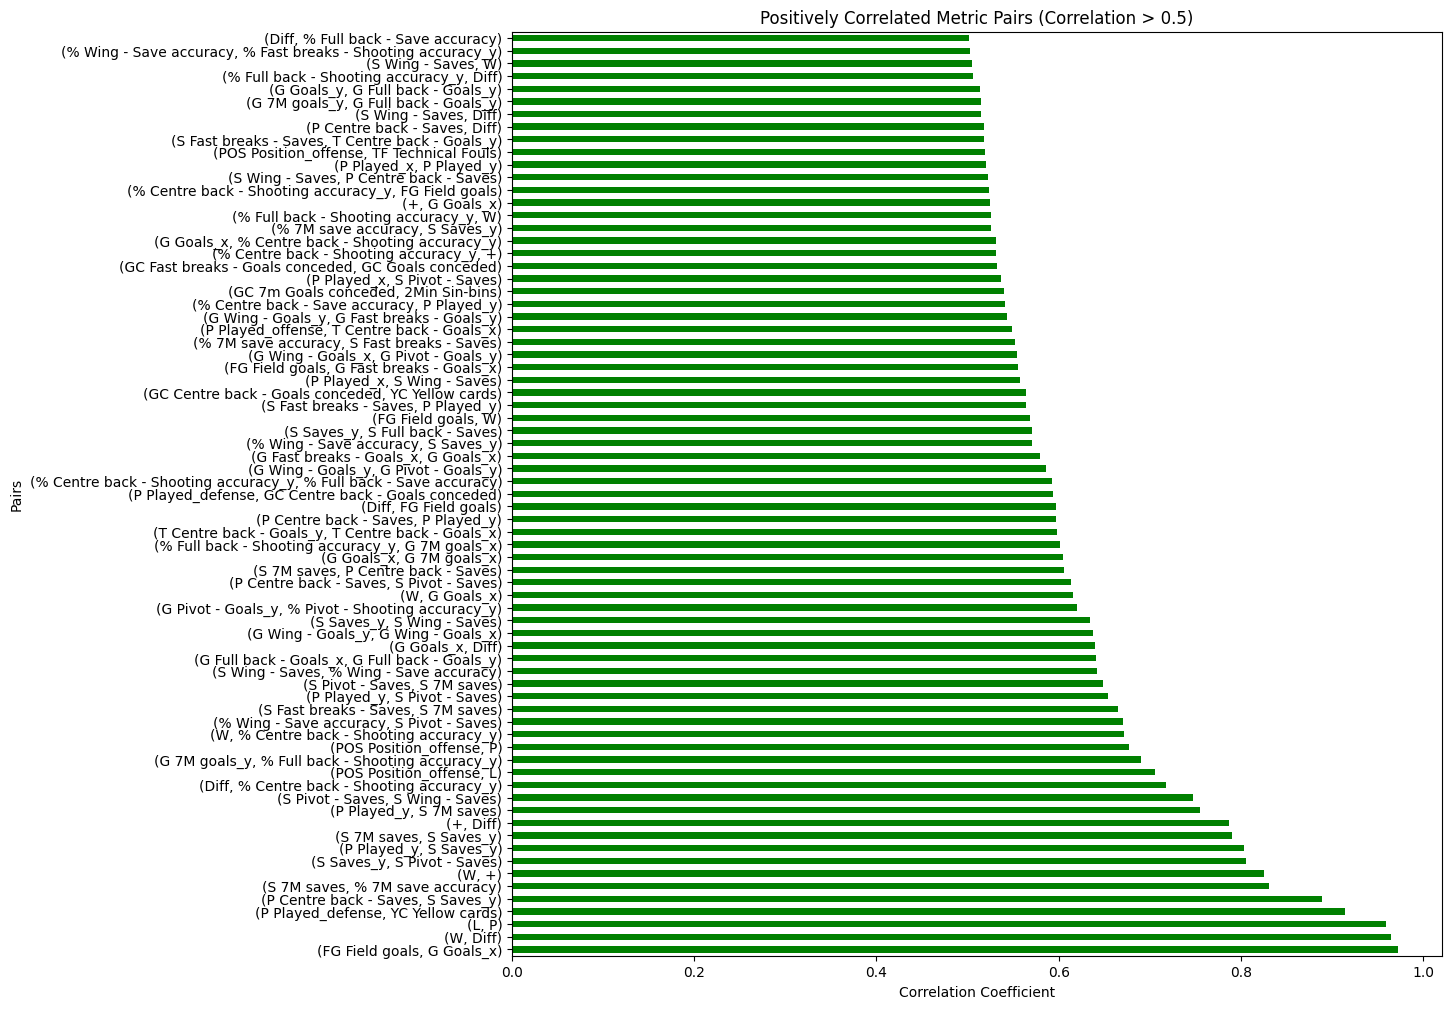

<Figure size 1200x800 with 0 Axes>

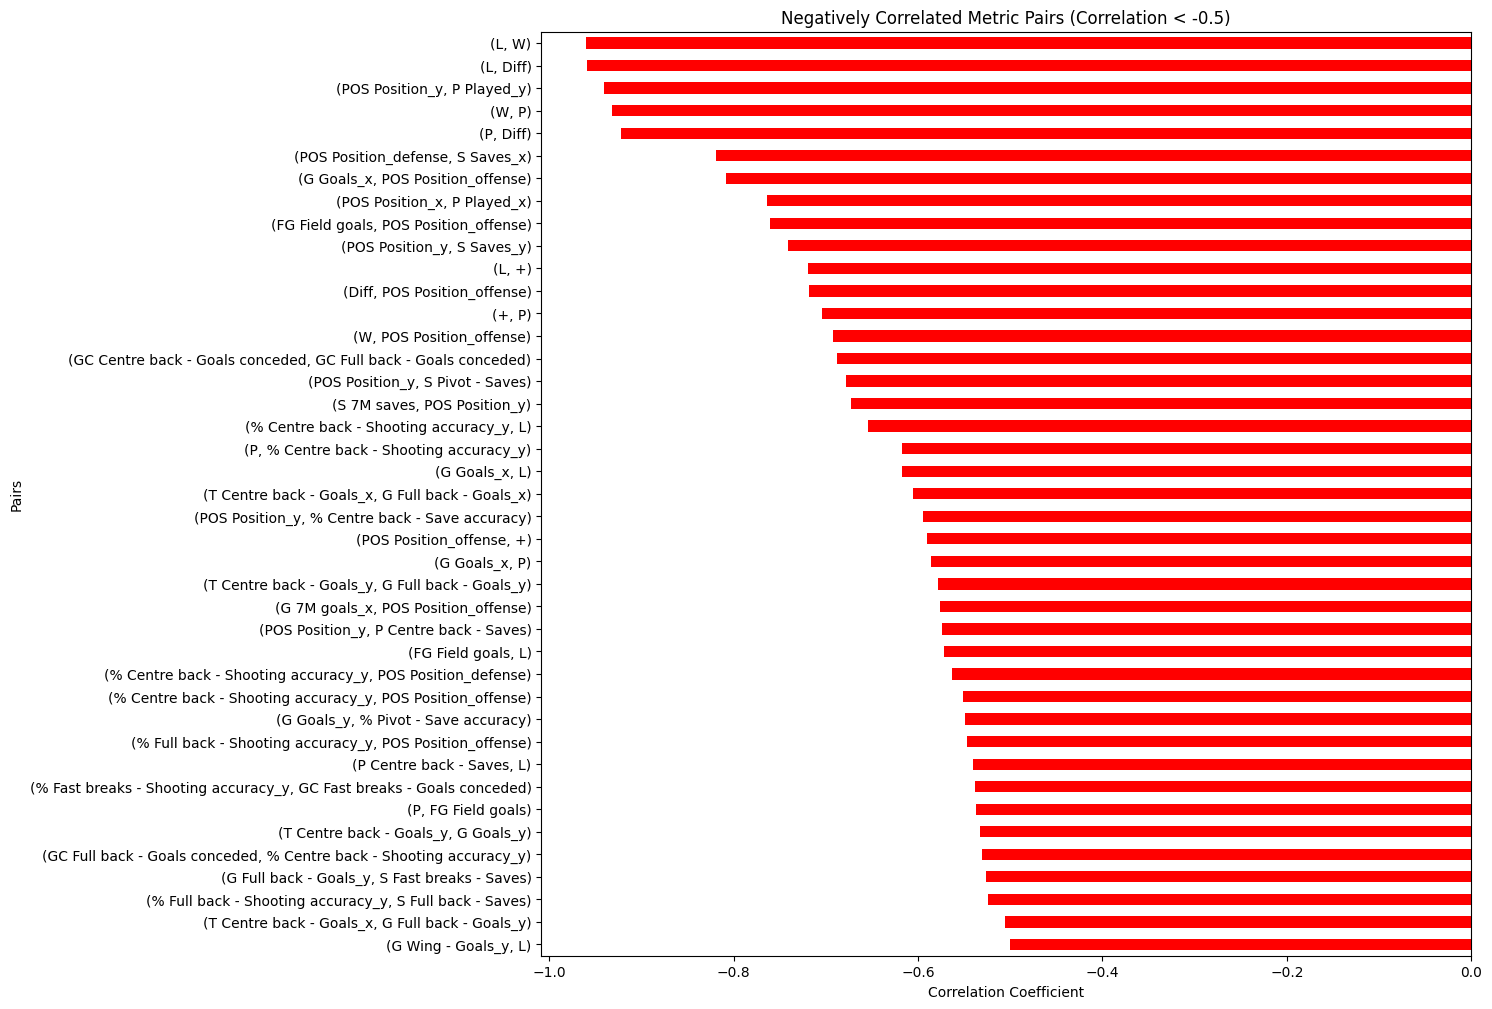

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_data_filtered is already created and loaded with the necessary data

# Drop non-numeric columns before calculating correlations
numeric_columns_only = merged_data_filtered.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_columns_only.corr()

# Unstack the correlation matrix and reset index to get a tidy format
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Metric1', 'Metric2', 'Correlation']

# Remove self-correlations (correlation of 1.0)
correlation_pairs = correlation_pairs[correlation_pairs['Metric1'] != correlation_pairs['Metric2']]

# Sort the correlation pairs by the correlation value in descending order
correlation_pairs = correlation_pairs.sort_values(by='Correlation', ascending=False)

# Drop duplicates (since each correlation is mirrored)
correlation_pairs['Pairs'] = list(zip(correlation_pairs.Metric1, correlation_pairs.Metric2))
correlation_pairs.set_index('Pairs', inplace=True)
correlation_pairs = correlation_pairs.drop(columns=['Metric1', 'Metric2']).drop_duplicates()

# Separate positive and negative correlations
positive_correlations = correlation_pairs[correlation_pairs['Correlation'] > 0.5]
negative_correlations = correlation_pairs[correlation_pairs['Correlation'] < -0.5]

# Plotting positive correlations
plt.figure(figsize=(12, 8))
positive_correlations.plot(kind='barh', color='green', figsize=(12, 12), legend=False)
plt.xlabel('Correlation Coefficient')
plt.title('Positively Correlated Metric Pairs (Correlation > 0.5)')
plt.show()

# Plotting negative correlations
plt.figure(figsize=(12, 8))
negative_correlations.plot(kind='barh', color='red', figsize=(12, 12), legend=False)
plt.xlabel('Correlation Coefficient')
plt.title('Negatively Correlated Metric Pairs (Correlation < -0.5)')
plt.show()


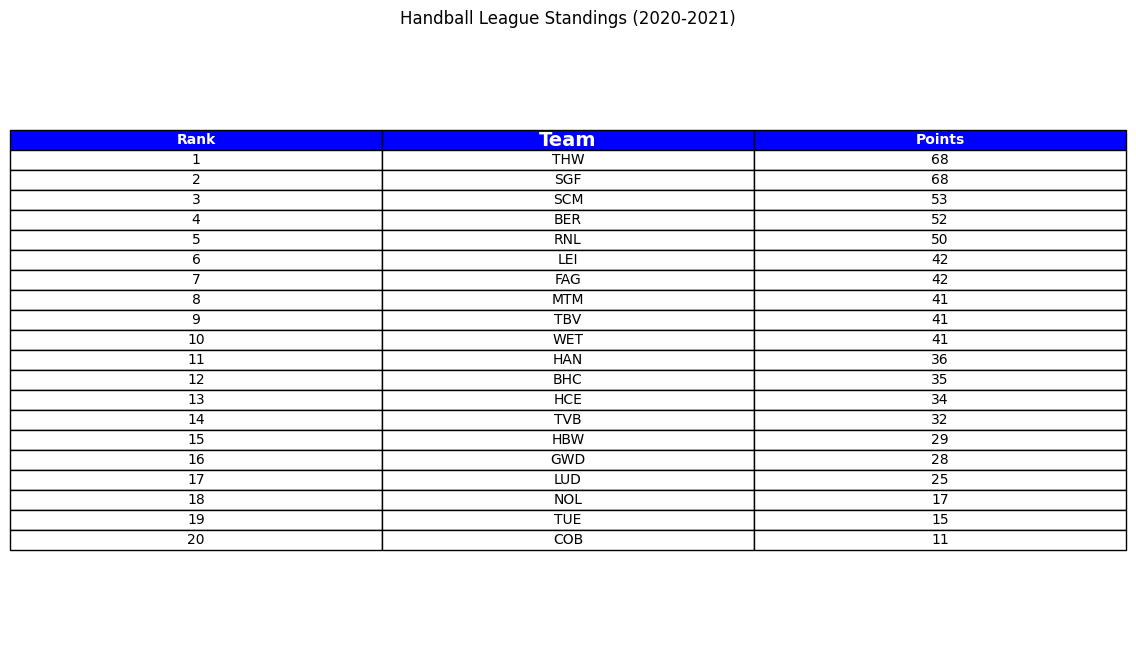

In [47]:
# Load the dataset
file_path = 'Overall_standings_2020_2021_modified.csv'
league_table = pd.read_csv(file_path)

# Update the points using the formula 2*W + 1*D
league_table['Points'] = 2 * league_table['W'] + 1 * league_table['D']

# Sort the table by points in descending order
sorted_league_table = league_table.sort_values(by='Points', ascending=False).reset_index(drop=True)

# Add rank column
sorted_league_table['Rank'] = range(1, len(sorted_league_table) + 1)

# Creating a visual table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

# Creating the table with the added Rank column
table_data = sorted_league_table[['Rank', 'Team', 'Points']].values.tolist()
column_labels = ['Rank', 'Team', 'Points']

table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Color the header row
header = table[0, 1].get_text()
header.set_color('white')
header.set_fontweight('bold')
header.set_fontsize(14)

for i in range(len(column_labels)):
    cell = table[0, i]
    cell.set_facecolor('blue')
    cell.set_text_props(color='white', weight='bold')

# Display the table
table20 = plt
table20.title('Handball League Standings (2020-2021)')
table20.show()


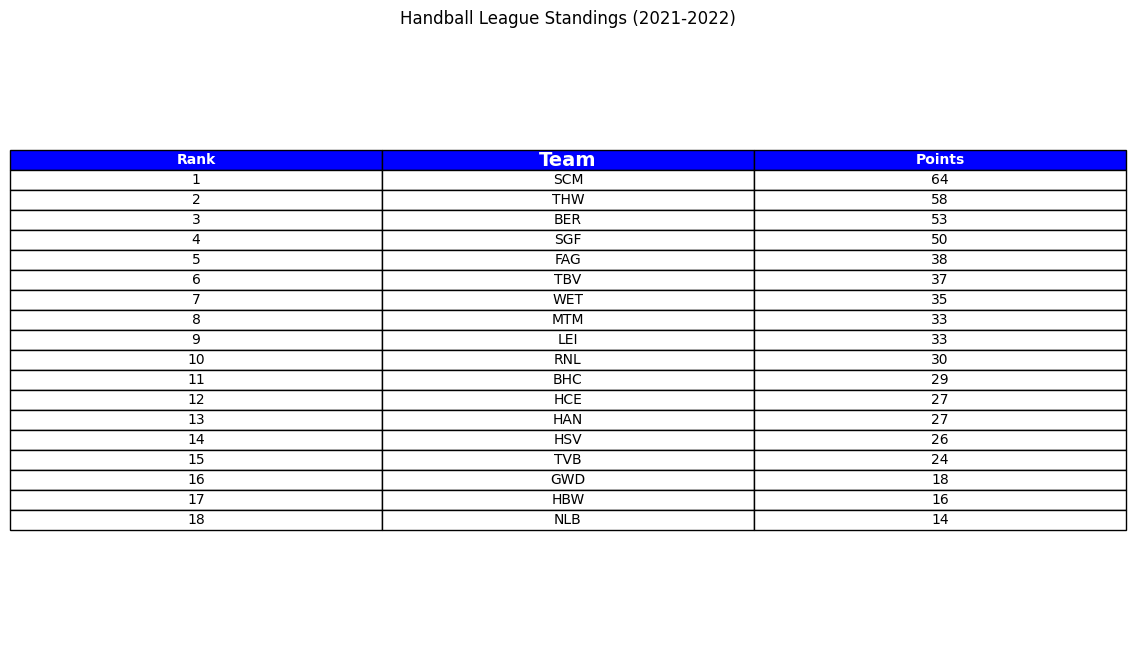

In [48]:
# Load the dataset
file_path = 'Overall_standings_2021_2022_modified.csv'
league_table = pd.read_csv(file_path)


# Update the points using the formula 2*W + 1*D
league_table['Points'] = 2 * league_table['W'] + 1 * league_table['D']

# Sort the table by points in descending order
sorted_league_table = league_table.sort_values(by='Points', ascending=False).reset_index(drop=True)

# Add rank column
sorted_league_table['Rank'] = range(1, len(sorted_league_table) + 1)

# Creating a visual table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

# Creating the table with the added Rank column
table_data = sorted_league_table[['Rank', 'Team', 'Points']].values.tolist()
column_labels = ['Rank', 'Team', 'Points']

table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Color the header row
header = table[0, 1].get_text()
header.set_color('white')
header.set_fontweight('bold')
header.set_fontsize(14)

for i in range(len(column_labels)):
    cell = table[0, i]
    cell.set_facecolor('blue')
    cell.set_text_props(color='white', weight='bold')

# Display the table
table21 = plt
table21.title('Handball League Standings (2021-2022)')
table21.show()


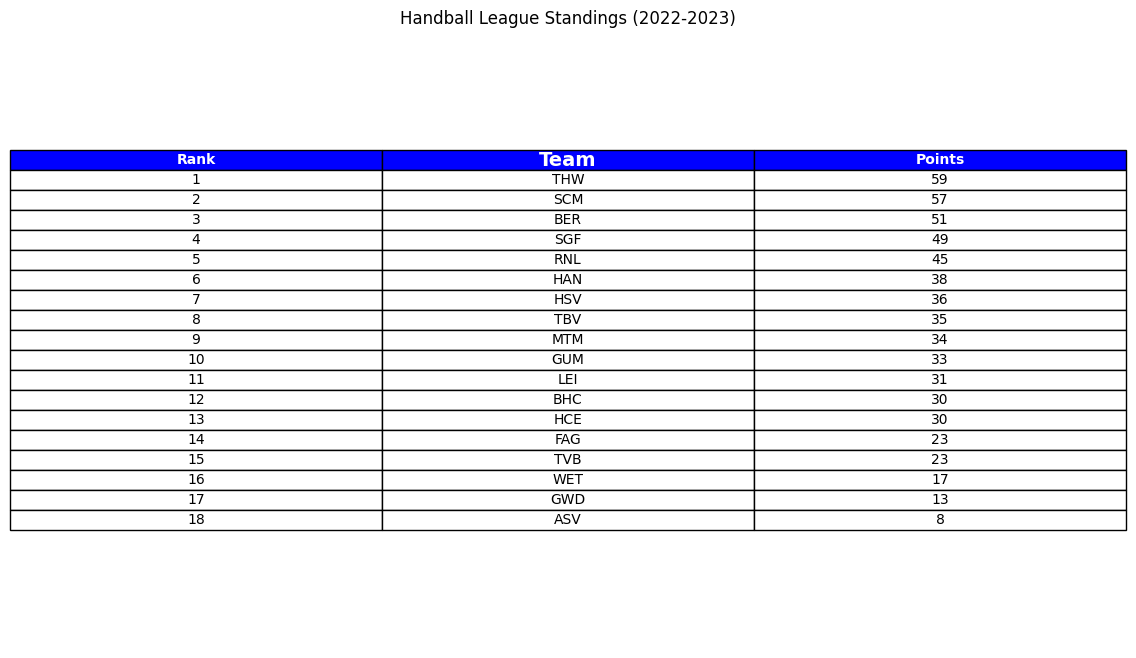

In [49]:
# Load the dataset
file_path = 'Overall_standings_2022_2023_modified.csv'
league_table = pd.read_csv(file_path)

# Update the points using the formula 2*W + 1*D
league_table['Points'] = 2 * league_table['W'] + 1 * league_table['D']

# Sort the table by points in descending order
sorted_league_table = league_table.sort_values(by='Points', ascending=False).reset_index(drop=True)

# Add rank column
sorted_league_table['Rank'] = range(1, len(sorted_league_table) + 1)

# Creating a visual table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

# Creating the table with the added Rank column
table_data = sorted_league_table[['Rank', 'Team', 'Points']].values.tolist()
column_labels = ['Rank', 'Team', 'Points']

table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Color the header row
header = table[0, 1].get_text()
header.set_color('white')
header.set_fontweight('bold')
header.set_fontsize(14)

for i in range(len(column_labels)):
    cell = table[0, i]
    cell.set_facecolor('blue')
    cell.set_text_props(color='white', weight='bold')

# Display the table
table22 = plt
table22.title('Handball League Standings (2022-2023)')
table22.show()


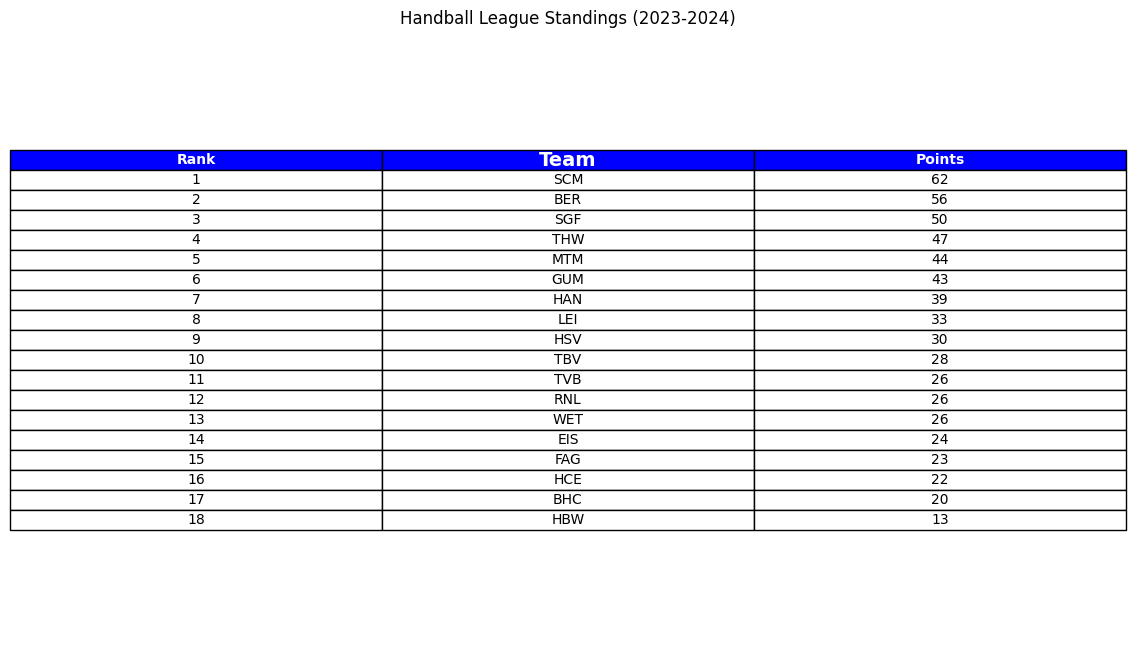

In [50]:
# Load the dataset
file_path = 'Overall_standings_2023_2024_modified.csv'
league_table = pd.read_csv(file_path)

# Update the points using the formula 2*W + 1*D
league_table['Points'] = 2 * league_table['W'] + 1 * league_table['D']

# Sort the table by points in descending order
sorted_league_table = league_table.sort_values(by='Points', ascending=False).reset_index(drop=True)

# Add rank column
sorted_league_table['Rank'] = range(1, len(sorted_league_table) + 1)

# Creating a visual table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('tight')
ax.axis('off')

# Creating the table with the added Rank column
table_data = sorted_league_table[['Rank', 'Team', 'Points']].values.tolist()
column_labels = ['Rank', 'Team', 'Points']

table = ax.table(cellText=table_data, colLabels=column_labels, cellLoc='center', loc='center')

# Customize table appearance
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Color the header row
header = table[0, 1].get_text()
header.set_color('white')
header.set_fontweight('bold')
header.set_fontsize(14)

for i in range(len(column_labels)):
    cell = table[0, i]
    cell.set_facecolor('blue')
    cell.set_text_props(color='white', weight='bold')

# Display the table
table23 = plt
table23.title('Handball League Standings (2023-2024)')
table23.show()
